# Working with Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Working through a data munging example

### Objective

Read the file `movies.csv` into a data frame. Plot the popularity of differnet movie genres over the years.

![Figure](movies.png)

### Step 0: Load data set

In [2]:
df = pd.read_csv('movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Step 1: Extract Year into its own columne

In [3]:
df['year'] = df['title'].str.extract('\((\d{4})\)', expand=True)

In [4]:
df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### Step 2: Extract each genre and put into single column

In [5]:
df1 = df['genres'].str.split('|', expand=True)

In [6]:
df1 = pd.concat([df, df1], axis=1)

In [7]:
df1.head()

,movieId,title,genres,year,0,1,2,3,4,5,6,7,8,9
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy,Romance,None,None,None,None,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,1995,Comedy,None,None,None,None,None,None,None,None,None


In [8]:
df2 = pd.melt(df1, id_vars=['title', 'year'], 
        value_vars=list(range(10)), value_name='genre')

In [9]:
df2.head()

,title,year,variable,genre
0,Toy Story (1995),1995,0,Adventure
1,Jumanji (1995),1995,0,Adventure
2,Grumpier Old Men (1995),1995,0,Comedy
3,Waiting to Exhale (1995),1995,0,Comedy
4,Father of the Bride Part II (1995),1995,0,Comedy


In [10]:
df2.dropna(inplace=True)

In [11]:
df2.drop('variable', axis=1, inplace=True)

In [12]:
df2.head()

,title,year,genre
0,Toy Story (1995),1995,Adventure
1,Jumanji (1995),1995,Adventure
2,Grumpier Old Men (1995),1995,Comedy
3,Waiting to Exhale (1995),1995,Comedy
4,Father of the Bride Part II (1995),1995,Comedy


### Step 3: Count sub-groups

In [13]:
df3 = df2.groupby(['year', 'genre']).count()
df3.head()

title
year genre           
1902 Action         1
     Adventure      1
     Fantasy        1
     Sci-Fi         1
1915 Drama          1

### Step 4: Unstack to get desired table

In [14]:
df4 = df3.unstack(1)

In [15]:
df4.head()

title                                                   \
genre (no genres listed) Action Adventure Animation Children Comedy Crime   
year                                                                        
1902                 NaN    1.0       1.0       NaN      NaN    NaN   NaN   
1915                 NaN    NaN       NaN       NaN      NaN    NaN   NaN   
1916                 NaN    1.0       1.0       NaN      NaN    NaN   NaN   
1917                 NaN    NaN       NaN       NaN      NaN    1.0   NaN   
1918                 NaN    NaN       NaN       NaN      NaN    1.0   NaN   

                                                                               \
genre Documentary Drama Fantasy Film-Noir Horror IMAX Musical Mystery Romance   
year                                                                            
1902          NaN   NaN     1.0       NaN    NaN  NaN     NaN     NaN     NaN   
1915          NaN   1.0     NaN       NaN    NaN  NaN     NaN     NaN     NaN   
1916          NaN   1.0     NaN       NaN    NaN  NaN     NaN     NaN     NaN   
1917          NaN   NaN     NaN       NaN    NaN  NaN     NaN     NaN     NaN   
1918          NaN   NaN     NaN       NaN    NaN  NaN     NaN     NaN     NaN   

                                    
genre Sci-Fi Thriller  War Western  
year                                
1902     1.0      NaN  NaN     NaN  
1915     NaN      NaN  1.0     NaN  
1916     1.0      NaN  NaN     NaN  
1917     NaN      NaN  NaN     NaN  
1918     NaN      NaN  NaN     NaN

### Step 5: Clean up and plotting

In [16]:
df4.columns = df4.columns.levels[1]
df4.head()

genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1902,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1916,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1917,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1918,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df4.fillna(0, inplace=True)
df4 = df4.astype('int')
df4.head()

genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1902,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1915,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1916,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1917,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1918,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


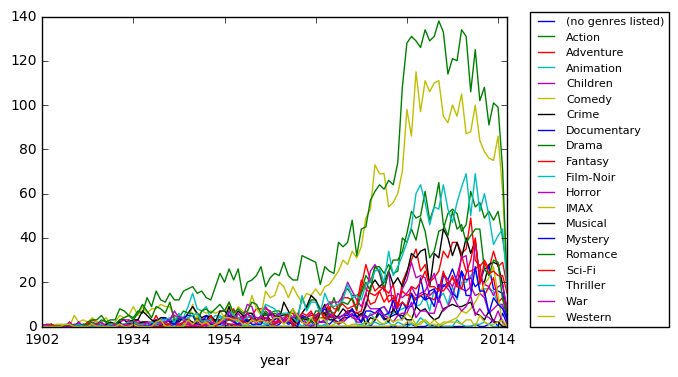

In [19]:
df4.plot.line()
plt.legend(loc=(1.05, 0), fontsize=8)